In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#设置全局属性
plt.rcParams['figure.figsize'] = (12,8)
sns.set(style='white',color_codes=True)


iris = pd.DataFrame(load_iris().data)#构造数据框
iris.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
iris['Species'] = load_iris().target



In [ ]:
#iris.head()
#iris.describe()
#iris.info()
#iris['Species'].value_counts

In [30]:
#箱型图
#ax = sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
#ax = sns.stripplot(x='Species',y='PetalLengthCm',data=iris,jitter=True,edgecolor='gray')
                                                        #stripplot画散点图，jetter使各个散点分开，不会在一条直线

In [31]:
#小提琴图
#sns.violinplot(x="Species",y="PetalLengthCm",data=iris,size=6)

In [32]:
#散点图
#sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
              #数据 颜色：第三变量 图像大小     画散点图      横轴           纵轴          加图例                                         
#plt.show()

In [34]:
#pairplot
#sns.pairplot(iris,hue="Species",size=3.5,diag_kind='kde')
#对角线，kde核密度估计图

0.9333333333333333


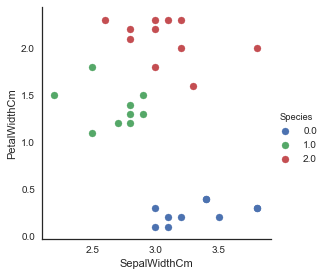

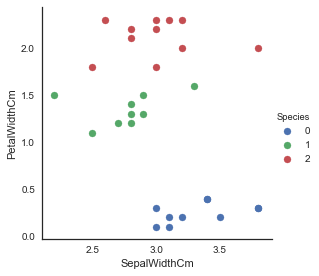

In [61]:
#k_means聚类
from sklearn.model_selection import train_test_split
y = iris['Species']
X = iris.drop('Species',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#预测
km = KMeans(n_clusters=3)
km.fit(X_train[['SepalWidthCm','PetalWidthCm']].values)
predict = km.predict(X_test[['SepalWidthCm','PetalWidthCm']].values)

#结果分析，机器预测的label可能和species可能不同
def exchange_predict_label(x):
    if x==0:
        return 2
    elif x==1:
        return 0
    else:
        return 1
    
#为了用Facegrid画出聚类有的散点图和真实的散点图对比，需要构造两个DataFrame对象
predict = np.array([i for i in map(exchange_predict_label,predict)])#map用来把predict数组中每个元素运行一遍exchange函数
X_test_np = np.concatenate([X_test[['SepalWidthCm','PetalWidthCm']].values,predict.reshape(-1,1)],axis=1)
X_test_df = pd.DataFrame(X_test_np,columns=['SepalWidthCm','PetalWidthCm','Species'])
X_test_true = pd.concat([X_test[['SepalWidthCm','PetalWidthCm']],y_test],axis=1)

ax = sns.FacetGrid(X_test_df,hue='Species',size=4).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()
ax = sns.FacetGrid(X_test_true,hue='Species',size=4).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

#准确率
print(np.mean(predict==y_test))

0.9333333333333333


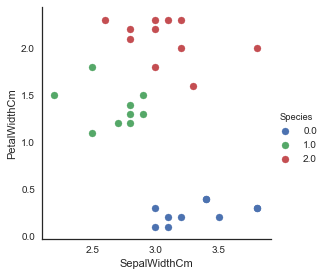

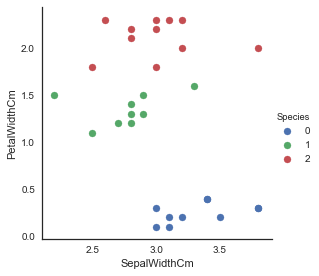

In [62]:
#GMM聚类
#预测
gmm = KMeans(n_clusters=3)
gmm.fit(X_train[['SepalWidthCm','PetalWidthCm']].values)
predict = gmm.predict(X_test[['SepalWidthCm','PetalWidthCm']].values)

#结果分析，机器预测的label可能和species可能不同
def exchange_predict_label(x):
    if x==0:
        return 2
    elif x==1:
        return 0
    else:
        return 1
    
#为了用Facegrid画出聚类有的散点图和真实的散点图对比，需要构造两个DataFrame对象
predict = np.array([i for i in map(exchange_predict_label,predict)])#map用来把predict数组中每个元素运行一遍exchange函数
X_test_np = np.concatenate([X_test[['SepalWidthCm','PetalWidthCm']].values,predict.reshape(-1,1)],axis=1)
X_test_df = pd.DataFrame(X_test_np,columns=['SepalWidthCm','PetalWidthCm','Species'])
X_test_true = pd.concat([X_test[['SepalWidthCm','PetalWidthCm']],y_test],axis=1)

ax = sns.FacetGrid(X_test_df,hue='Species',size=4).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()
ax = sns.FacetGrid(X_test_true,hue='Species',size=4).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

#准确率
print(np.mean(predict==y_test))